## Import the required libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


## Load the cleaned CSVs

In [13]:
benin = pd.read_csv('../data/cleaned/benin_clean.csv')
sierra = pd.read_csv('../data/cleaned/sierraleone_clean.csv')
togo = pd.read_csv('../data/cleaned/togo_clean.csv')


## Add a country label to each dataset and combine

In [14]:
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df_all = pd.concat([benin, sierra, togo], ignore_index=True)


## Use seaborn to generate one boxplot per metric

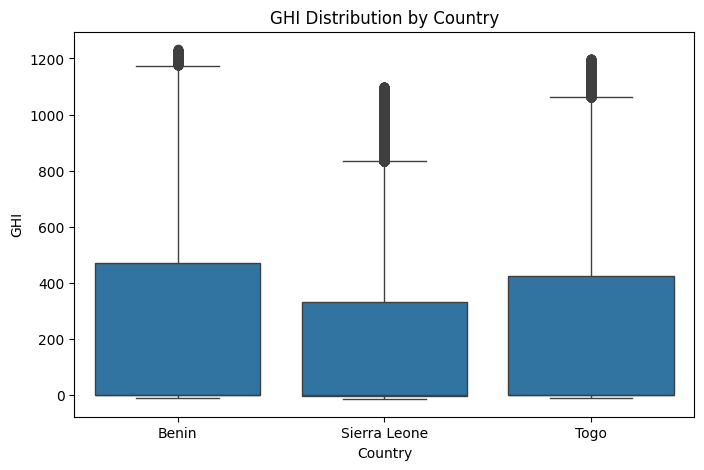

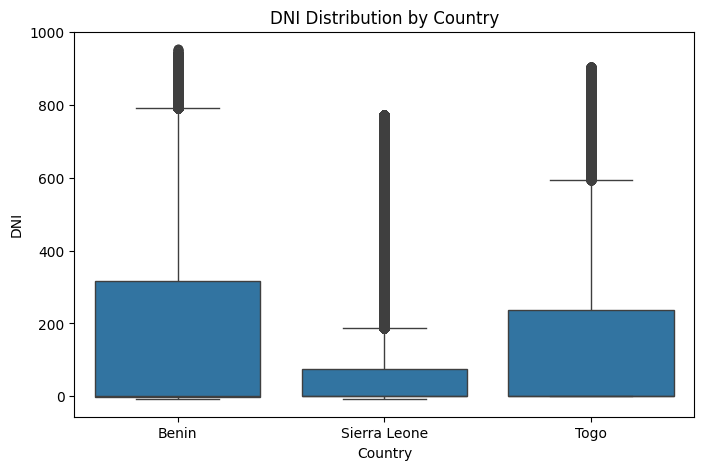

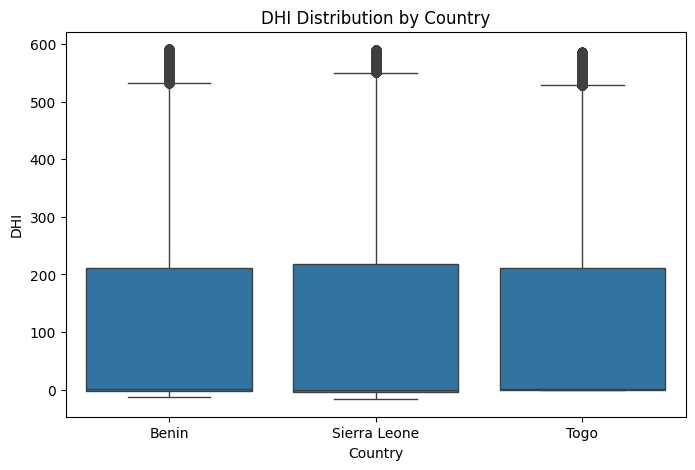

In [15]:
metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} Distribution by Country')
    plt.show()


## Summary Table

In [16]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
display(summary)


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  153.69  
Togo          151.57

## Statistical Testing (ANOVA or Kruskal-Wallis)

In [17]:
f_stat, p_val = stats.f_oneway(
    benin['GHI'],
    sierra['GHI'],
    togo['GHI']
)
print(f"ANOVA test for GHI: F={f_stat:.2f}, p={p_val:.4f}")


ANOVA test for GHI: F=3833.18, p=0.0000


## (Optional ): Visual Summary

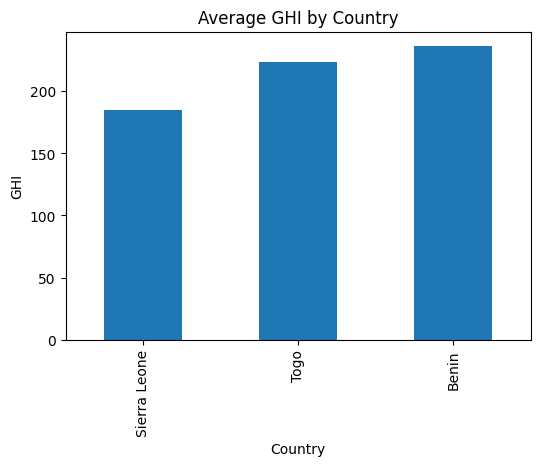

In [18]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values()
avg_ghi.plot(kind='bar', title='Average GHI by Country', ylabel='GHI', figsize=(6,4))
plt.show()
